# Control Systems Introduction

(A nice introduction would go here explaining the definition of impulse responses, transfer functions, the difference between discrete and continuous forms, etc.)

Also, a diagram of the problem with $G(s) = \frac{1}{0.2s + 1}$ should go here as well

The scipy.signal library is incredibly helpful and important for this project. First step is to define your continuous system and then from there you have the ability to discretize directly from the object or to call the const2discrete function. Once both systems (continuous and discrete) are built, providing inputs is as simple as calling the function directly or as a method belonging to the object.

/home/matt/venvs/lib/python3.8/site-packages/scipy/signal/filter_design.py:1631: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


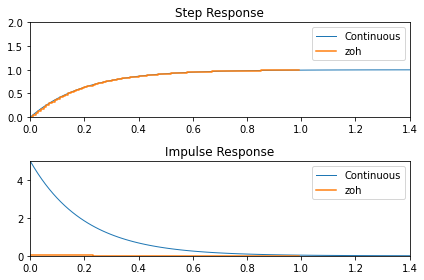

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lti, dstep, step, impulse, dimpulse

# Define linear time invariant continuous system
G_s = lti([1.0], [0.2, 1.0])

# Convert continuous to discrete form
dt = 0.01
g_k = G_s.to_discrete(dt)

# Provide a step (continuous or discrete depending on the system)
t, x = step(G_s)
s, x_d = dstep(g_k)

# Plot step response
ax1 = plt.subplot(211)
ax1.plot(t, x, label='Continuous', linewidth=1)
ax1.step(s, np.squeeze(x_d), label='zoh', where='post')
ax1.axis([0, 1.4, 0, 2])
ax1.legend(loc='best')
ax1.set_title('Step Response')

# Provide an impulse (continuous or discrete depending on the system)
t, x = impulse(G_s)
s, x_d = dimpulse(g_k)

# Plot impulse response
ax2 = plt.subplot(212)
ax2.plot(t, x, label='Continuous', linewidth=1)
ax2.step(s, np.squeeze(x_d), label='zoh', where='pre')
ax2.axis([0, 1.4, 0, 5])
ax2.legend(loc='best')
ax2.set_title('Impulse Response')

plt.tight_layout()
plt.show()